In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
from PIL import Image
import scipy.io

In [88]:
def loadData():
    data_path = os.path.join(os.getcwd(),'data')
    data = sio.loadmat(os.path.join(data_path, 'Salinas_corrected.mat'))['salinas_corrected'] 
    labels = sio.loadmat(os.path.join(data_path, 'Salinas_gt.mat'))['salinas_gt']
    return data, labels

In [89]:
data, labels = loadData()

In [90]:
data.shape

(512, 217, 204)

In [91]:
labels.shape

(512, 217)

In [118]:
dataset_corrected = np.array(data)
dataset_gt = np.array(labels)

dataset_corrected = np.swapaxes(dataset_corrected, 0, 2)
dataset_corrected.shape

(204, 217, 512)

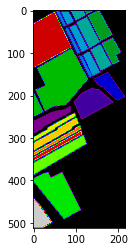

In [119]:
fig, ax = plt.subplots(1, 1)
ax.imshow(labels, cmap='nipy_spectral')

In [120]:
label_img = Image.fromarray(labels)
label_img.save('images/labels_salinas.png')

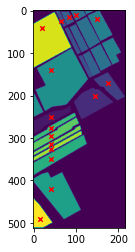

In [121]:
pointsWithLabels = []
pointsWithLabels.append(["Brocoli-green-weeds1", [40, 250]])
pointsWithLabels.append(["Brocoli-green-weeds1", [145, 200]])
pointsWithLabels.append(["Fallow", [175, 170]])
pointsWithLabels.append(["Fallow-rough-plow", [65, 25]])
pointsWithLabels.append(["Fallow-smooth", [84, 15]])
pointsWithLabels.append(["Stubble", [100, 10]])
pointsWithLabels.append(["Celery", [150, 20]])
pointsWithLabels.append(["Grapes-untrained", [40, 140]])
pointsWithLabels.append(["Soil-vinyard-develop", [40, 420]])
pointsWithLabels.append(["Corn-senesced-weeds", [40, 350]])
pointsWithLabels.append(["Lettuce-romaine-4wk", [40, 276]])
pointsWithLabels.append(["Lettuce-romaine-5wk", [40, 295]])
pointsWithLabels.append(["Lettuce-romaine-6wk", [40, 315]])
pointsWithLabels.append(["Lettuce-romaine-7wk", [40, 325]])
pointsWithLabels.append(["Vinyard-untrained", [20, 40]])
pointsWithLabels.append(["Vinyard-treils", [15, 490]])

points = []
for i in range(len(pointsWithLabels)):
    points.append(pointsWithLabels[i][1])

points = np.array(points)
plt.imshow(label_img)
plt.scatter(points[:, 0], points[:, 1], marker="x", color="red", s=20)
plt.show()   

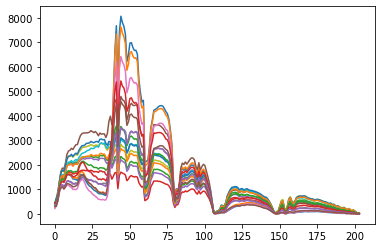

In [125]:
for i in range(points.shape[0]):
    x = points[i][0]
    y = points[i][1]
    plt.plot(dataset_corrected[:, x, y], label = pointsWithLabels[i][0])

#plt.legend(loc="right")
plt.show()